# CNN

Red Neuronal Convolucional para la materia Tecnologías Exponenciales - TIC


### Librerias

Importamos las librerías respectivas que vamos a usar a lo largo del trabajo. Principalmente Numpy para los arrays, Pil para manipular las imagenes a la hora de evaluarlo junto con colab files. 

Todo lo de tenserflow y keras son capas con las librerías necesarias para el modelo y el entrenamiento.

In [13]:
import numpy as np
from PIL import Image
from google.colab import files
from IPython.display import HTML, display
import tensorflow as tf 
from keras.utils import to_categorical


from keras import models  
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout 
from keras_visualizer import visualizer  
import tensorflow as tf


# Cargamos el dataset de MNIST con información sobre numeros escritos a mano.

from keras.datasets import mnist

## Setup

### Values

#### Training Values

Aquí retraemos los datos de la base de datos de Keras que extraimos en las librerías. Los convertimos a variables para poder evaluarlo. 

Las primeras dos variables son las imagenes, y el numero que significaría la imagen en cuestion. Las otras dos variables tienen el proposito de servir para poder verificar la precisión del modelo, pero no serán utilizadas.

Luego reescalamos las imagenes para tener una dimensión de 4, necesaria para el modelo.

1 conjunto de 60000 imagenes de 28 * 28 pixeles

Luego lo convertimos a float y lo normalizamos para una mayor precision.

In [14]:
# Cargamos los datos.

(EntrenImg, EntrenNombre), (Testeo, TesteoNombre) = mnist.load_data()

# Cambiamos el tamaño de las imagenes. Ejemplo: 60000 imagenes de 28 * 28.

EntrenImg = EntrenImg.reshape(60000, 28, 28, 1)


# Cambiamos los valores de la imagen a punto flotante.

EntrenImg = EntrenImg.astype('float32')

# Normalizamos la imagen.

EntrenImg = EntrenImg / 255



# Creando el modelo.

Aca optimizamos y creamos el modelo de entrenamiento.

La secuencia con la que será evaluada el modelo que inciaremos tomando por un convolucional bidimensional, que ira obteniendo pequeños fragmentos de la imagen. En este caso el tamaño de las imagenes es de (3, 3), y con 28 fragmentos para los filtros.

Luego con el MaxPooling hacemos un resumen de la información que tenemos. Finalmente con el Flatten achicamos esa información a algo unidimensional.

Creamos luego varias capas con un dropout para el entrenamiento, hasta llegar a 10 neuronas, que van a hacer nuestras neuronas de salida.

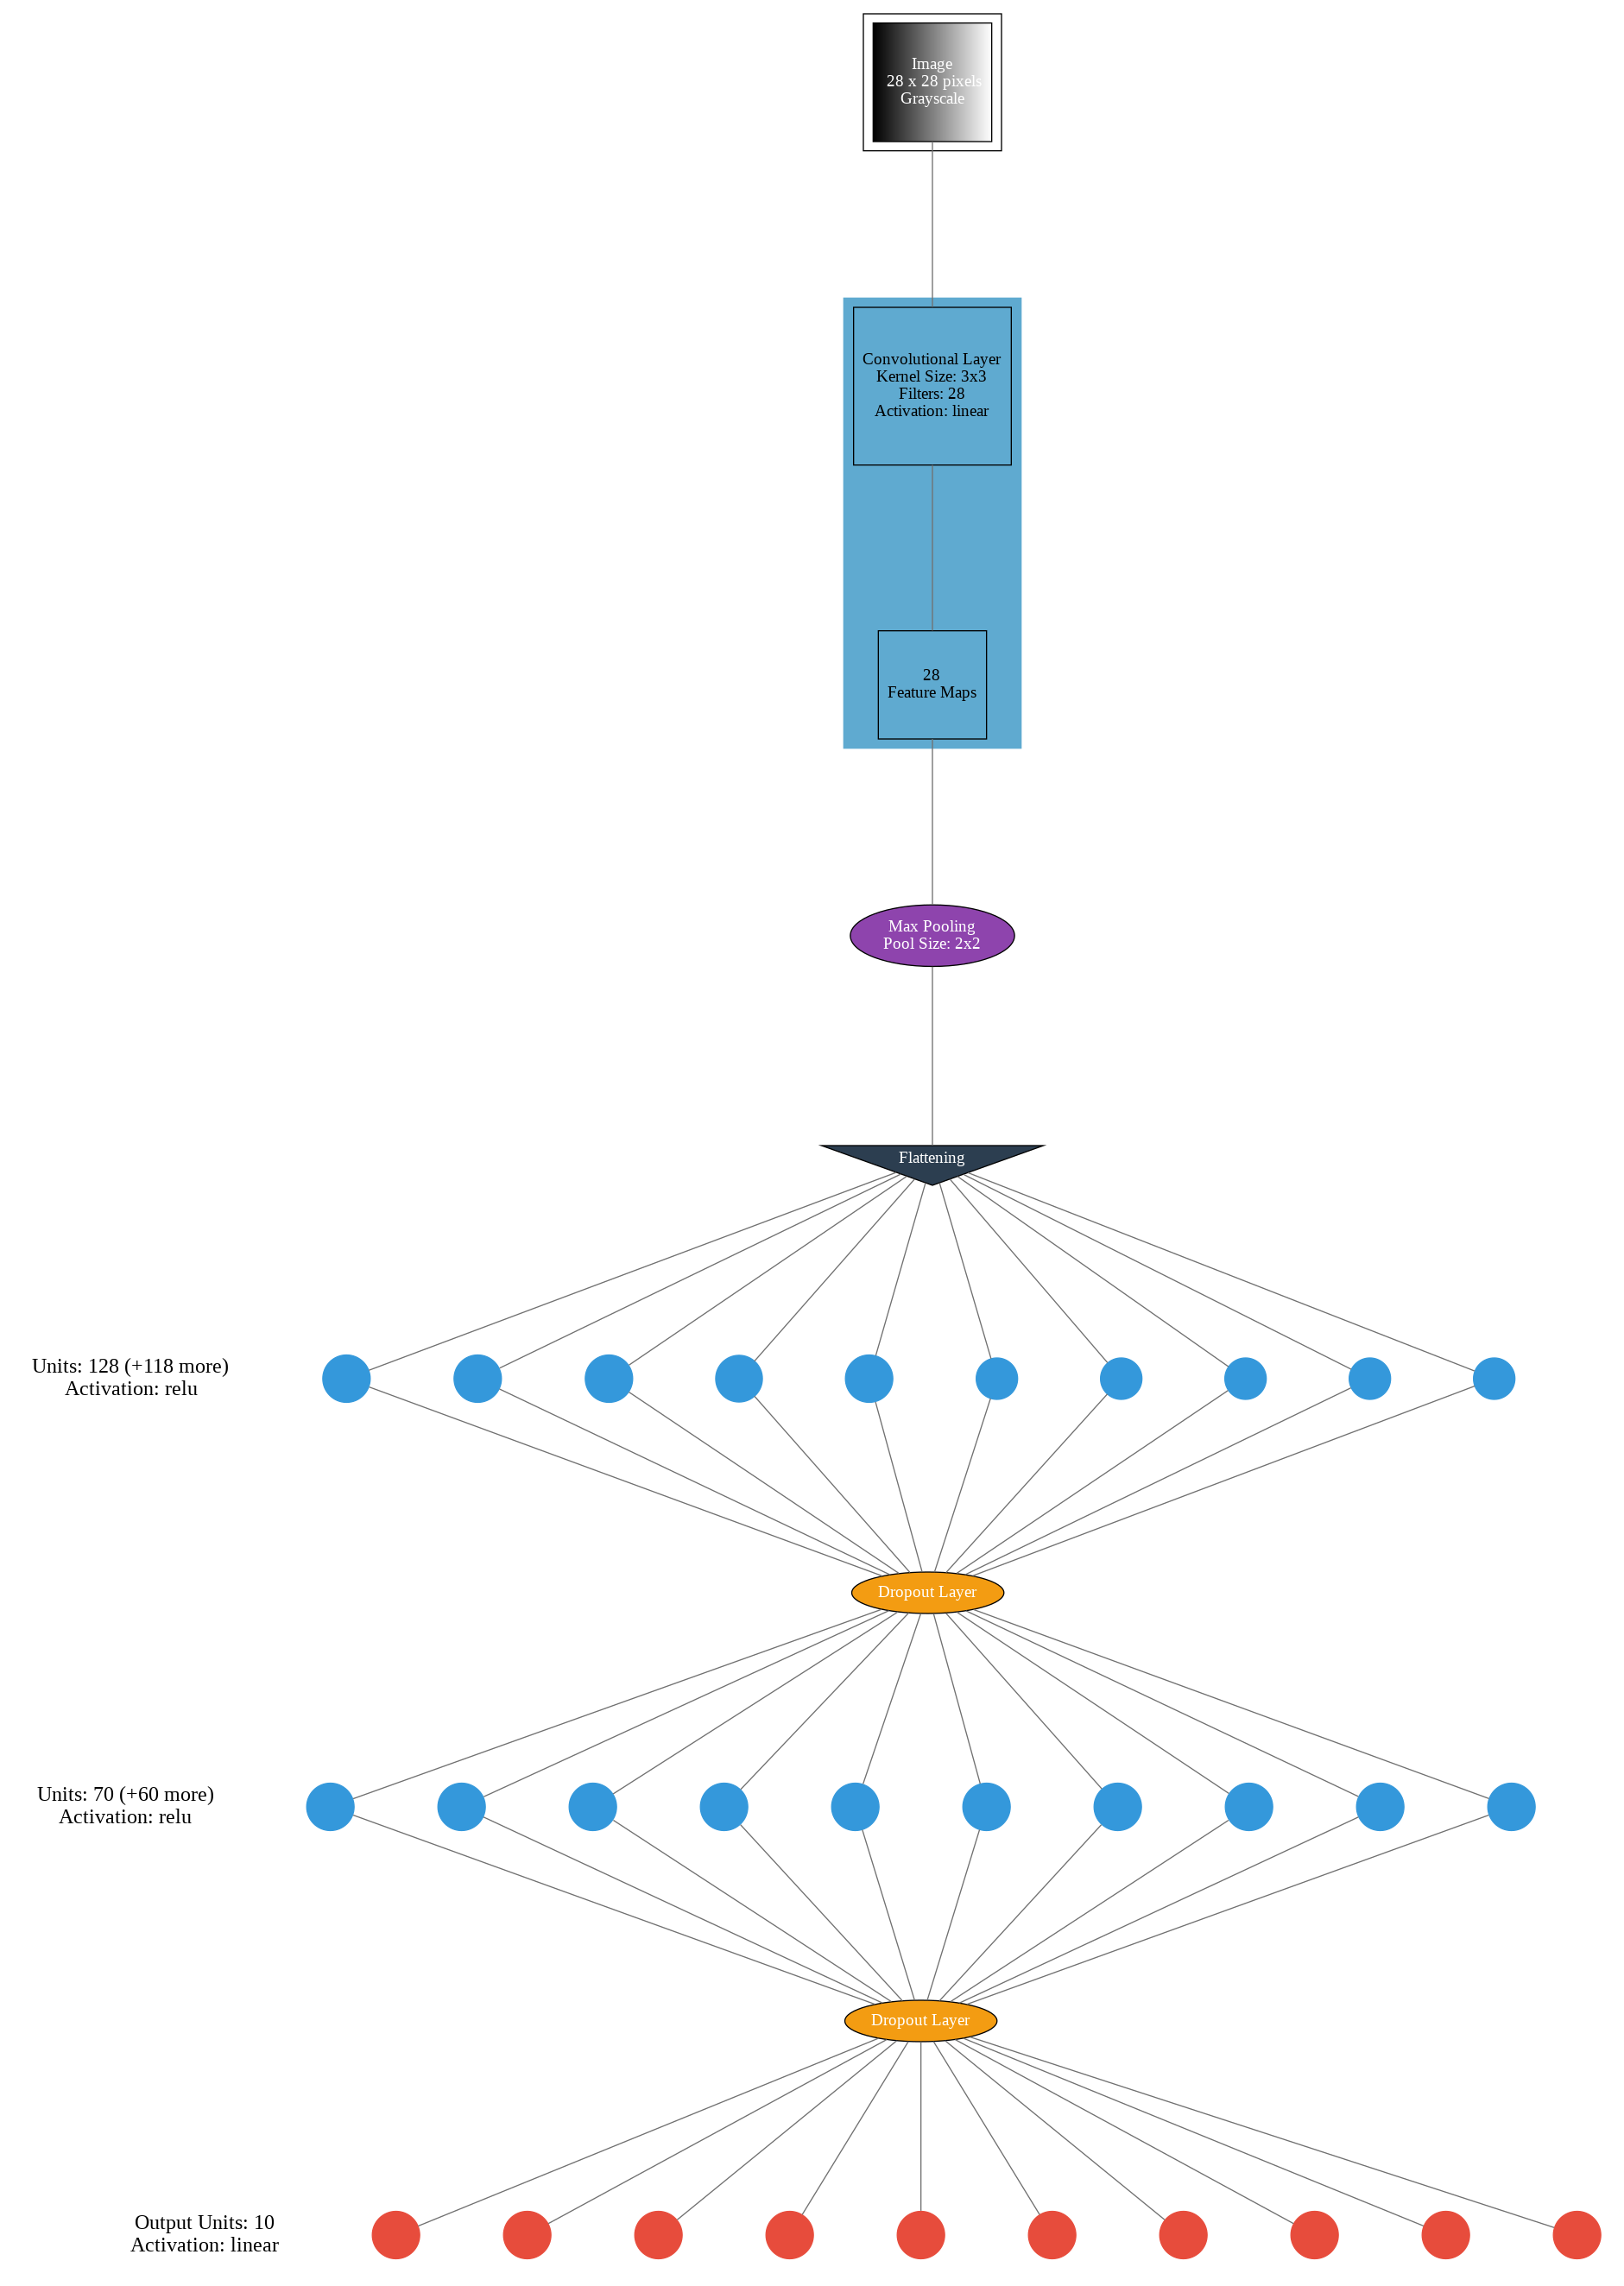

In [22]:
model = models.Sequential() # Iniciamos la sequencia.


model.add(Conv2D(28, kernel_size=(3,3), input_shape = (28, 28, 1)))

# Iniciamos una capa convolucional bidimensional. 28 filtros de 3, 3.

model.add(MaxPooling2D(pool_size=(2, 2))) 

# Achicamos a una de 2 , 2

model.add(Flatten()) 

# Achicamos el valor

model.add(Dense(128, activation=tf.nn.relu, use_bias=True)) 

# Creamos una capa de 128 neuronas.

model.add(Dropout(0.5)) 

# Bias de 0.5

model.add(Dense(70, activation=tf.nn.relu, use_bias=True))

# Creamos una capa de 70 neuronas.
model.add(Dropout(0.5))

#  Bias

model.add(Dense(10,activation=tf.nn.softmax)) 

# Ultimas 10 neuronas restantes.

visualizer(model, format='png', view=True)

Image.open(f"graph.png")

# Entrenamiento

Utilizamos el entrenador de Keras para entrenar nuestra red neuronal.

La compilamos y luego empezamos con el entrenamiento en base a nuestra base de datos de imagenes. Repetimos 12 veces para asegurarnos una mayor precisión.

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Pasamos los datos de lo que queremos entrenar.

model.fit(x= EntrenImg,y= EntrenNombre, epochs=12)

Epoch 1/12
1875/1875 [==============================] - 24s 12ms/step - loss: 0.4995 - accuracy: 0.8519
Epoch 2/12
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2320 - accuracy: 0.9374
Epoch 3/12
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1822 - accuracy: 0.9504
Epoch 4/12
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1505 - accuracy: 0.9595
Epoch 5/12
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1326 - accuracy: 0.9630
Epoch 6/12
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1247 - accuracy: 0.9654
Epoch 7/12
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1151 - accuracy: 0.9687
Epoch 8/12
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1070 - accuracy: 0.9705
Epoch 9/12
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1019 - accuracy: 0.9719
Epoch 10/12
1875/1875 [==============================] - 22s 12m

# Utilizando la IA

Finalmente aquí subimos una imagen de 28*28.

La abrimos con un Image.open(f"nombredelarchivo") y realizamos la predicción.

La predicción nos devuelve un array con la posición de cada neurona, y esa posición la convertimos a html para resaltarla.

In [48]:
#Importamos el archivo.

files.upload()

#Importamos la imagen con el nombre del archivo.

x = Image.open(f"trol.png")

display(x)

x = np.array(x)

display(x.shape)

x = x.reshape(1, 28, 28, 1)

# Realizamos la predicción.

rta = model.predict(
    x,
    batch_size=None,
    verbose="auto",
    steps=None,
    callbacks=None,
    max_queue_size= x.shape,
    workers=1,
    use_multiprocessing=False,
)

# Escribimos que numero es.

large = lambda x : display(HTML('<p style="font-size: 50px; color: #66D148">'+str(x)+'</p>'))

large(np.argmax(rta))

Saving trol.png to trol.png


(28, 28)

1/1 [==============================] - 0s 13ms/step
